In [12]:
import pandas as pd
import numpy as np
import json
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_column', 50)

In [ ]:
pip install openpyxl

In [73]:
def read_file(): #reading files inside the folders
    
    import glob
    directory_path = r'src/Dataset' #

    # filenames = glob.glob(path + "\*.xlsx")
    excel_files = glob.glob(os.path.join(directory_path, '*.xlsx'))
    excel_files.sort()
#     print('File names:', csv_filenames)
    
    return excel_files

In [74]:
def create_frames(excel_files):
    files = []
    dict_data = {'new_car_detail': [], 'new_car_overview': [], 'new_car_feature': [],
                      'new_car_specs': [], 'car_links': [], 'place': []}
    main_frame = pd.DataFrame(dict_data)
    
    for index, file in enumerate(excel_files):
        df = pd.read_excel(file)
        
        # Extract the filename without extension
        f = os.path.splitext(os.path.basename(file))[0]
        
        files.append(f'{index},{f}')
        city_name = f.split("_")[0]
        df['place'] = city_name
        main_frame = pd.concat([main_frame, df], axis=0)
        
    return files, main_frame





In [75]:
main_frame = create_frames(read_file())

print('Cities Available', main_frame[0])

cardf = main_frame[1]
cardf.head()

Cities Available ['0,bangalore_cars', '1,chennai_cars', '2,delhi_cars', '3,hyderabad_cars', '4,jaipur_cars', '5,kolkata_cars']


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,place
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore


In [88]:

def cardetail(df):
     
    
    #replace single quote with double quote to make everything as json and replace none with 1
    df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
    
    cars_detail = {'it': [], 'ft': [], 'bt': [], 'km': [], 'transmission': [], 'ownerNo': [], 'owner': [],
                  'oem': [], 'model': [], 'modelYear': [], 'centralVariantId': [], 'variantName': [],
                  'price': [], 'priceActual': [], 'priceSaving': [],
                  'priceFixedText': [], 'trendingText': [] } #dict.fromkeys(unique_detail_keys, [])

    #taking out all the values and appending them in cars_detail
    for detail in df['new_car_detail']:

        for key in cars_detail.keys():
            
            if key in detail.keys():
                cars_detail[key].append(detail[key])
        
    return pd.DataFrame(cars_detail)




In [90]:
cardf['new_car_detail'] = cardf['new_car_detail'].apply(lambda x: json.loads(str(x).replace("'", '"').replace('None', '1')))
detail_frame = cardetail(df.loc[:, ['new_car_detail']])

detail_frame['place'] = cardf.place.to_list()
detail_frame.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,place
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore


In [102]:
def caroverview(df):
    # Convert dictionary objects to JSON strings
    df.new_car_overview = df['new_car_overview'].apply(lambda x: json.dumps(x))
    
    # Replace single quote with double quote to ensure valid JSON syntax
    df.new_car_overview = df.new_car_overview.str.replace("'", '"')
    
    # Replace 'None' with '1' to ensure valid JSON syntax
    df.new_car_overview = df.new_car_overview.str.replace('None', '1')
    
    # Convert JSON strings back to dictionaries
    df.new_car_overview = df.new_car_overview.apply(lambda x: json.loads(x))
    
    # Dictionary creator for overview column
    def overview_dict_creator(overview):
        all_overviews = {}
        if 'top' in overview:
            for dictionary in overview['top']:
                all_overviews.update({dictionary['key']: dictionary['value']})
        return all_overviews


    df.new_car_overview = df.new_car_overview.apply(lambda overview: overview_dict_creator(overview))
    
    print("converted dictionary ---->", df.new_car_overview.to_list()[0])

    # Find unique keys
    unique_overview_keys = []
    for dictionary in df.new_car_overview:
        for key in dictionary:
            if key not in unique_overview_keys:
                unique_overview_keys.append(key)

    print('all overview keys ---->', unique_overview_keys)
    
    # Create a dictionary for overview columns
    overview_dict = {'Registration Year': [], 'Insurance Validity': [], 'Fuel Type': [], 'Seats': [], 
                     'Kms Driven': [], 'RTO': [], 'Ownership': [], 'Engine Displacement': [], 'Transmission': [],
                     'Year of Manufacture': []}

    # Populate overview dictionary
    for view in df.new_car_overview:
        for key in overview_dict:
            if key in view.keys():
                overview_dict[key].append(view[key])
            else:
                overview_dict[key].append(None)
    
    return pd.DataFrame(overview_dict)

df2 = caroverview(cardf)
df2


converted dictionary ----> {}
all overview keys ----> []


,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8364,None,None,None,None,None,None,None,None,None,None
8365,None,None,None,None,None,None,None,None,None,None
8366,None,None,None,None,None,None,None,None,None,None
8367,None,None,None,None,None,None,None,None,None,None


In [103]:
def to_get_features(data):
    extract = {'Features': [],
               "Comfort": [],
               "Interior":[],
               "Exterior": []
               }
    
    for features in data['top']:
        extract['Features'].append(features['value'])
    try:
        for comfort in data['data'][0]['list']:
            extract['Comfort'].append(comfort['value'])
    except:
        extract['Comfort'].append('Not-Specified')


    try:
        for interior in data['data'][1]['list']:
            extract['Interior'].append(interior['value'])
    except:
        extract['Interior'].append('Not-Specified')
    
    try:
        for exterior in data['data'][2]['list']:
            extract['Exterior'].append(exterior['value'])
    except:
        extract['Exterior'].append(None)
    # print(extract)
    return extract

cardf.new_car_feature = cardf.new_car_feature.apply(lambda x: to_get_features(eval(x)))
df3 =pd.DataFrame(cardf.new_car_feature.tolist())
df3

,Features,Comfort,Interior,Exterior
0,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
1,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
2,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
3,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
4,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
...,...,...,...,...
8364,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte..."
8365,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
8366,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog..."
8367,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog..."


In [104]:
final_df =pd.concat([detail_frame, df2, df3], axis=1)
final_df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,place,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Features,Comfort,Interior,Exterior
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,kolkata,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte..."
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,kolkata,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,kolkata,None,None,None,None,None,None,None,None,None,None,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog..."
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,1,{'imgUrl': 'https://s

In [105]:
final_df.isna().sum()

it                        0
ft                        0
bt                        0
km                        0
transmission              0
ownerNo                   0
owner                     0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
priceActual               0
priceSaving               0
priceFixedText            0
trendingText              0
place                     0
Registration Year      8369
Insurance Validity     8369
Fuel Type              8369
Seats                  8369
Kms Driven             8369
RTO                    8369
Ownership              8369
Engine Displacement    8369
Transmission           8369
Year of Manufacture    8369
Features                  0
Comfort                   0
Interior                  0
Exterior                  0
dtype: int64

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   it                   8369 non-null   int64 
 1   ft                   8369 non-null   object
 2   bt                   8369 non-null   object
 3   km                   8369 non-null   object
 4   transmission         8369 non-null   object
 5   ownerNo              8369 non-null   int64 
 6   owner                8369 non-null   object
 7   oem                  8369 non-null   object
 8   model                8369 non-null   object
 9   modelYear            8369 non-null   int64 
 10  centralVariantId     8369 non-null   int64 
 11  variantName          8369 non-null   object
 12  price                8369 non-null   object
 13  priceActual          8369 non-null   object
 14  priceSaving          8369 non-null   object
 15  priceFixedText       8369 non-null   int64 
 16  trendi

In [25]:
for i in final_df.columns:
    # print(i)
    if i not in ['Features','Comfort', 'Interior', 'Exterior', 'trendingText']:
        print(i, final_df[i].nunique())
        

it 1
ft 5
bt 11
km 4090
transmission 2
ownerNo 6
owner 6
oem 33
model 315
modelYear 29
centralVariantId 2713
variantName 2157
price 1400
priceActual 722
priceSaving 1
priceFixedText 0
Registration Year 233
Insurance Validity 7
Fuel Type 5
Seats 8
Kms Driven 4089
RTO 465
Ownership 5
Engine Displacement 150
Transmission 2
Year of Manufacture 22


In [107]:
price_colvalues = final_df.price.str.replace("₹","").str.strip().to_list() #replacing rupee sign to empty string

#to find the denominators
text = []
for PriceString in price_colvalues:
    
    try:
        if (PriceString.split()[1]).isalpha(): #splitting prices "8.11 Lakh" by spaces
            text.append(PriceString.split()[1])
    except:
        pass
    
print("price denominations >>>>>>>>>>> ",set(text))

price denominations >>>>>>>>>>>  {'Lakh', 'Crore'}


In [108]:
CroreCarsFrame = final_df[final_df.price.str.contains('Crore')]
CroreCarsFrame.loc[:,['place','km','model','modelYear','price']].sort_values(by = 'km').reset_index(drop=True)

,place,km,model,modelYear,price
0,delhi,"1,600",Land Rover Defender,2023,₹ 1.32 Crore
1,bangalore,"10,000",BMW X7,2022,₹ 1.30 Crore
2,delhi,"10,500",Toyota Vellfire,2023,₹ 1.19 Crore
3,delhi,101,Land Rover Defender,2023,₹ 1.32 Crore
4,chennai,"14,000",Mercedes-Benz S-Class,2020,₹ 1.18 Crore
5,delhi,"16,000",Mercedes-Benz GLS,2022,₹ 1.38 Crore
6,delhi,"3,500",Toyota Land Cruiser 300,2023,₹ 2.69 Crore
7,delhi,"3,500",Mercedes-Benz AMG G 63,2023,₹ 4.15 Crore
8,jaipur,"30,000",Porsche 911,2020,₹ 1.50 Crore
9,kolkata,"30,000",Mercedes-Benz AMG GT,2016,₹ 2.10 Crore


In [114]:
if len(cardf['new_car_detail'].to_list()) > 0:
    print("1st row value----->", cardf['new_car_detail'].to_list()[0])
else:
    print("The 'new_car_detail' column is empty.")

1st row value-----> {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': 1, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}


In [115]:
detail_frame.drop(['it','ownerNo','centralVariantId','priceActual','priceSaving','priceFixedText','trendingText'],axis = 1,inplace = True)

detail_frame.km = detail_frame.km.apply(lambda x : x.replace(",","")).astype(float)

detail_frame.head(3)

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3rd Owner,Maruti,Maruti Celerio,2015,VXI,400000.0,bangalore
1,Petrol,SUV,32706.0,Manual,2nd Owner,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,bangalore
2,Petrol,Hatchback,11949.0,Manual,1st Owner,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,bangalore


In [116]:
# Define the GetPrice function
def GetPrice(PriceString):
    try:
        if (PriceString.split()[1]).isalpha():
            if PriceString.split()[1] == "Crore":
                return float(PriceString.split()[0]) * 10000000
            elif PriceString.split()[1] == "Lakh":
                return float(PriceString.split()[0]) * 100000
    except:
        return float(PriceString.replace(",", ""))

# Convert 'price' column to string type
detail_frame['price'] = detail_frame['price'].astype(str)

# Apply string operations to the 'price' column
detail_frame['price'] = detail_frame['price'].str.replace("₹", "").str.strip()
detail_frame['price'] = detail_frame['price'].apply(GetPrice)
detail_frame.head()



,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3rd Owner,Maruti,Maruti Celerio,2015,VXI,400000.0,bangalore
1,Petrol,SUV,32706.0,Manual,2nd Owner,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,bangalore
2,Petrol,Hatchback,11949.0,Manual,1st Owner,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,bangalore
3,Petrol,Sedan,17794.0,Manual,1st Owner,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,bangalore
4,Diesel,SUV,60000.0,Manual,1st Owner,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,bangalore


### Fuel Type Vs OEM Vs Price

In [123]:
import plotly.graph_objects as go

FuelCountFrame = detail_frame['ft'].value_counts().to_frame().reset_index()

labels = FuelCountFrame['ft'].tolist()
values = FuelCountFrame['count'].tolist()

colors = ['red', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.3, 0])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000006', width=2)))

fig.update_layout(title_text="Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.5, y=0.9))
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)

fig.show()


In [124]:
OemCountFrame = detail_frame.oem.value_counts().to_frame().reset_index()

labels = OemCountFrame.oem.to_list()
values = OemCountFrame['count'].to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',hole =.3
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="OEM Wise Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

# The 4 OEMs with highest percentage of cars are Maruti, Hyundai, Honda and TATA
# We can see the costliest cars are having less percentage of cars and few cars collaborated with different OEM

In [125]:
#Available Cars counts in each Fuel Type in each oem

OemCountFrame = detail_frame.groupby(['oem','ft']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrame.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrame, x="oem", y="Total Cars",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Maximum cars are available from Maruti and Hyundai
#More No of petrol cars are available from Maruti and no cars of Electric, LPG
#CNG vechiles are only available from Maruti, Hyundai, TATA, Toyota, Mahindra, Honda
#LPG vechiles are only available from Hyundai, Marutia and Chevrolet
#Electric vechiles are only available from Tata, MG, Mahindra, Hyundai, Mercedes-benz and Mini
#Only Hyundai is having all Fuel type variant
#Datsun and Lexus cars are having only petrol type vehicles

In [126]:

#Available Car Price in each Fuel Type in each oem

OemPriceFrame = detail_frame.groupby(['oem','ft']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrame, x="oem", y="Avg Price",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Considerable increase in price in Petrol cars
#There is a lot of price difference in Electric cars


In [127]:
#Available KM's driven in each Fuel Type in each oem

OemKMFrame = detail_frame.groupby(['oem','ft']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrame.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrame, x="oem", y="Avg KM",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#There is a lot of increase in KM's driven in Petrol cars
#Since count of electric cars are less. So it is not used much.


### BT Type Vs OEM Vs Price

In [128]:
# Percentage of cars in each BT Type

import plotly.graph_objects as go

FuelCountFrame = detail_frame.bt.value_counts().to_frame().reset_index()

labels = FuelCountFrame.bt.to_list()
values = FuelCountFrame['count'].to_list()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="BT Type Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Hatchback, SUV, Sedan cars are available in maximum
#only one Hybrids car is available

In [129]:
#Available Cars counts in each BT Type in each oem

OemCountFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameBT.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameBT, x="oem", y="Total Cars",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()


#Mostly Hatchback cars are available in maximum in Maruti, Hyundai, TATA, Renault 
#Honda is having sedan cars in more numbers
#Mahindra, Isuzu and Tata are having Pickup Trucks cars
#Convertibles only availble in Mercedes-benz, Jaguar, Mini, Audi
#Only Volvo is having Hybrid type cars. Model name is Volvo XC 90

In [130]:
#Available Car Price in each BT Type in each oem

OemPriceFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrameBT['mean'] = OemPriceFrameBT["mean"].apply(lambda x : x/100000)

OemPriceFrameBT.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrameBT, x="oem", y="Avg Price",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Coupe, electric and SUV price is always been higher.
# Mercedes, Toyota, Maruti, Tata, Hyundai, Mahindra, Honda, Renault and Chevrolet are having multi variant cars more than 3

In [131]:
#Available KM's driven in each BT Type in each oem

OemKMFrameBT = detail_frame.groupby(['oem','bt']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrameBT.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrameBT, x="oem", y="Avg KM",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#considerably sedan and SUV vehicles are used in maximum

In [132]:
# Scatter plot of km vs price by owner

fig = px.scatter(detail_frame, x="km", y="price", color='owner')

fig.update_layout(title_text="Kilometers Driven vs Price vs Owner")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Kilometers Driven")
fig.update_yaxes(title_text="Price Of Cars")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Only Four vechicles are used maximum. More than 8 lac kms driven.

In [133]:
detail_frame[detail_frame['km']>800000]

,ft,bt,km,transmission,owner,oem,model,modelYear,variantName,price,place
1539,Diesel,Sedan,5500000.0,Automatic,1st Owner,Mercedes-Benz,Mercedes-Benz C-Class,2018,C 220 CDI Style,3600000.0,chennai
1996,Diesel,SUV,1200000.0,Manual,1st Owner,Mahindra,Mahindra Scorpio,2019,S5,1150000.0,chennai
2679,Diesel,MUV,2000022.0,Manual,1st Owner,Toyota,Toyota Innova Crysta,2017,2.4 VX MT,1750000.0,chennai
7610,Petrol,SUV,975000.0,Manual,1st Owner,Kia,Kia Sonet,2021,HTX Turbo iMT BSVI,975000.0,kolkata


### Transmission Vs OEM Vs Price

In [ ]:
detail_frame.transmission.value_counts().plot(kind='bar')

In [151]:
transmission_counts = detail_frame['transmission'].value_counts()

fig = go.Figure(data=[
    go.Bar(
        x=transmission_counts.index,  # transmission types
        y=transmission_counts.values,  # counts
        marker=dict(color='purple')  # custom color for bars
    )
])

fig.update_layout(
    title_text="Transmission Types and Counts",  # plot title
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)

fig.show()

In [152]:
OemPriceFrameTrans = detail_frame.groupby(['oem','transmission']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrameBT['mean'] = OemPriceFrameBT["mean"].apply(lambda x : x/100000)

OemPriceFrameTrans.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrameTrans, x="oem", y="Avg Price",color = 'transmission', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each Transmission Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#No manual vehicles in lexus, Porsche, Land Rover, BMW, Jaguar, Volvo, Mini


### Owner Vs OEM Vs Price

In [153]:
# Get the value counts of the 'owner' column
owner_counts = detail_frame['owner'].value_counts()

# Create a bar plot
fig = go.Figure(data=[
    go.Bar(
        x=owner_counts.index,  # categories (owners)
        y=owner_counts.values,  # counts
        marker=dict(color='blue')  # custom color for bars
    )
])

# Update layout
fig.update_layout(
    title_text="Count of Cars by Owner Type",  # plot title
    xaxis=dict(title='Owner Type'),  # x-axis label
    yaxis=dict(title='Count'),  # y-axis label
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)

# Show the plot
fig.show()


In [155]:
OemCountFrameOwner = detail_frame.groupby(['oem','owner']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameOwner.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameOwner, x="oem", y="Total Cars",color = 'owner', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each Owner Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#Single type owners are maximum

In [156]:
KMPriceFrame = detail_frame.groupby(['oem','owner']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#KMPriceFrame['mean'] = KMPriceFrame["mean"].apply(lambda x : x/100000)

KMPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(KMPriceFrame, x="oem", y="Avg Price",color = 'owner', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Avg Price Of Cars In Each Owner Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Avg Price Of Cars")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

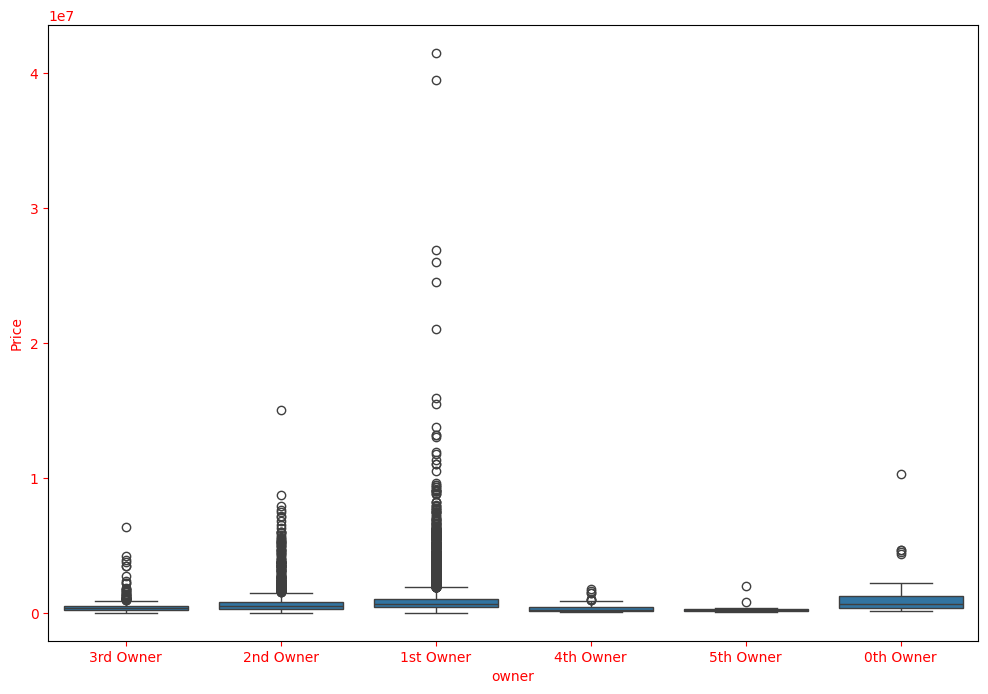

In [170]:
var = 'owner'
data = pd.concat([detail_frame['price'], detail_frame[var]], axis=1)
plt.figure(figsize=(12, 8))
sns.boxplot(x=var, y="price", data=data)

# Set background color and font color using Matplotlib

plt.gca().set_facecolor('white')  # Set background color to black
plt.gca().tick_params(colors='red')  # Set tick label color to white
plt.xlabel(var, color='red')  # Set x-axis label color to white
plt.ylabel('Price', color='red')  # Set y-axis label color to white

plt.show()

#### Most Available Cars Vs Avg Price

In [171]:
ModelCountFrame = detail_frame.groupby(['model']).price.agg(['count','mean']).sort_values(by = 'count',ascending = False).reset_index()

MostModelFrame = ModelCountFrame[:20]

MostModelFrame.rename(columns = {'count':'Total Cars','mean':'Avg Price'}, inplace = True)

fig = px.bar(MostModelFrame, x="model", y="Total Cars", color= 'Avg Price', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Model Wise Most No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Car Models")
fig.update_yaxes(title_text="Total No Of Cars Available")

C:\Users\jesik\AppData\Local\Temp\ipykernel_11232\1327429505.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Least Available Cars Vs Avg Price

In [172]:
ModelCountFrame = detail_frame.groupby(['model']).price.agg(['count','mean']).sort_values(by = 'count',ascending = False).reset_index()

MostModelFrame = ModelCountFrame.tail(20)

MostModelFrame.rename(columns = {'count':'Total Cars','mean':'Avg Price'}, inplace = True)

fig = px.bar(MostModelFrame, x="model", y="Total Cars", color= 'Avg Price', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Model Wise Least No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Car Models")
fig.update_yaxes(title_text="Total No Of Cars Available")

C:\Users\jesik\AppData\Local\Temp\ipykernel_11232\509540554.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### ModelYear Vs OEM Vs Total Counts

In [174]:
OemCountFrameYear = detail_frame.groupby(['oem','modelYear']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameYear.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameYear, x="oem", y="Total Cars",color = 'modelYear', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Years")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)
fig.show()

#### Total Cars Available Vs Years

In [175]:
CarCountByYear = detail_frame.modelYear.value_counts().to_frame().reset_index()
CarCountByYear.rename(columns = {'count':'Total Cars'}, inplace = True)

fig = px.bar(CarCountByYear, x="modelYear", y="Total Cars", orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="Year Wise Total No Of Cars Available")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Years Of Model")
fig.update_yaxes(title_text="Total No Of Cars Available")
fig.update_layout(
    plot_bgcolor='black',  # Set background color to black
    paper_bgcolor='black',  # Set paper (outside plot area) color to black
    font=dict(color='white')  # Set text color to white
)